<a href="https://colab.research.google.com/github/Collqin/MasterActuariales/blob/main/Pr%C3%A1ctica%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 5: Paridad PUT - CALL

## Renta Variable y Derivados Finacieros

### Lucía Cochón López

En esta práctica vamos a realizar un ejemplo de paridad PUT-CALL que no se cumple y que, por tanto, permite arbitraje. En este caso el precio de mercado es menor que el precio teórico, lo que significa que el CALL está barato y compraremos el CALL + el bono y venderemos el PUT + el activo.

In [2]:
import random
import math
import numpy as np

In [9]:
S = 120
E = 110
P = 4
t = 1
Bono_0 = 100
Bono_T = E
i = 0.1
r = np.log(1+i)
C_mercado = 10
C_teorico = S + P - E * np.exp(-r*t)

Sn = 90

Sabemos que la paridad PUT_CALL se cumple cuando:  
$C + Ee^{rt} = S + P$  
Donde: 
*   $C$ = Call
*   $Ee^{-rt}$ = Bono
*   $S$ = Acción
*   $P$ = Put

Y es en el caso de que no se cumpla esta igualdad donde se puede realizar el arbitraje:

In [11]:
Call = C_mercado
Bono = Bono_0
Accion = S
Put = P

Call + Bono == Accion + Put

False

In [12]:
Estrategia_1 = Call + Bono
Estrategia_2 = Accion + Put

Estrategia = Estrategia_1 - Estrategia_2

if Estrategia != 0:
  print("Estrategia de Arbitraje")

if Estrategia_1<Estrategia_2:
  print("Comprar Call y Vender Put")
else:
  print("Comprar Put y Vender Call")

Estrategia de Arbitraje
Comprar Call y Vender Put


Adicionalmente hemos creado un activo sintético a partir de los datos del ejercicio: 

[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
[130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90]
[-24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24 -24
 -24 -24 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4]
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24]
[-20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3
  -2  -1   0   1   2   3   4   5   6   7   8 

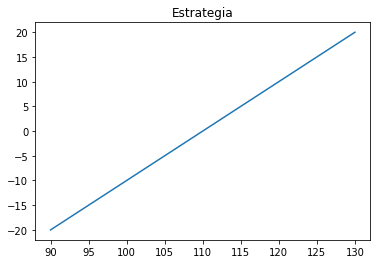

In [59]:
import matplotlib.pyplot as pyplot

Precio_Call = 110
Precio_Put = 110
Prima = 24
N_contratos = 1

Rango = 20
S = [*range(Precio_Call - Rango, Precio_Put + Rango +1)]
S_1 = S
S_2 = [*range(Precio_Put + Rango, Precio_Call - Rango -1, -1)]


Valor_Call = [0]*len(S)
Valor_Put = [0]*len(S)

for i in range(0, len(S)):
  if S[i] < Precio_Call:
    Valor_Call[i] = 0 - Prima
  else:
    Valor_Call[i] = S[i] - Precio_Call - Prima


for i in range(0, len(S)):
  if S[i] > Precio_Put:
    Valor_Put[i] = 0 + Prima
  else:
    Valor_Put[i] = S[i] - Precio_Put + Prima

Valor_Call = np.array(Valor_Call)
Valor_Put = np.array(Valor_Put)

Total = Valor_Call + Valor_Put

print(S)
print(S_1)
print(S_2)

print(Valor_Call)
print(Valor_Put)

print(Total)


pyplot.plot(S, Total)
pyplot.title("Estrategia")
pyplot.show()
